In [1]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
DATASET_PATH = pd.read_csv("C:/Users/Acer/Desktop/Projeto/intelligent-systems-project/data/sample_products.csv")
DATASET_PATH

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37995,13230578,1756482,mochila personalizada galinha pintadinha,1,2,Mochila Galinha Pintadinha M,primaria 2019 1 aninho abdulzinho mochilas ani...,2016-09-17 10:49:39,18.790000,149.0,1,27,321,NaN,Lembrancinhas
37996,6736914,9301388,tag dia dos pais,1,32,30 TAGS DIA DOS PAIS 005,dia pais,2019-06-12 17:03:52,31.680000,7.0,1,1,43,NaN,Papel e Cia
37997,11017911,8732362,kit bolsa maternidade,5,31,Kit bolsa bebê maternidade personalizada,paula carvalho bebe,2018-08-24 11:43:00,543.170000,3006.0,1,4,515,18.0,Bebê
37998,6807331,1869417,festa 15 anos,1,8,Chaveiro Almofada 15 anos,yasmin centro mesa compras 15 anos 2020 lembra...,2017-10-21 18:49:56,10.720000,18.0,1,53,2456,138.0,Lembrancinhas


Uma vez que não possuo um conhecimento muito amplo na limguagem, optei por um modelo que considere somente as variáveis quantitativas. Não incluí a variável 'order_counts', que representa o número de vezes que o produto foi comprado nos últimos três meses, pois, ela possui muitos valores faltantes e isso prejudicaria o modelo. Por fim retirei todas as observações que possuiam alguma célula vazia.

In [3]:
DATASET_PATH_1 = DATASET_PATH[['search_page','position','price','weight','minimum_quantity','view_counts','category']]
DATASET_PATH_2 = DATASET_PATH_1.dropna()
DATASET_PATH_2

,search_page,position,price,weight,minimum_quantity,view_counts,category
0,2,6,171.890000,1200.0,4,244,Decoração
1,2,0,77.670000,8.0,5,124,Papel e Cia
2,1,38,73.920006,2709.0,1,59,Outros
3,1,6,118.770004,0.0,1,180,Bebê
4,3,38,191.810000,507.0,6,34,Decoração
...,...,...,...,...,...,...,...
37995,1,2,18.790000,149.0,27,321,Lembrancinhas
37996,1,32,31.680000,7.0,1,43,Papel e Cia
37997,5,31,543.170000,3006.0,4,515,Bebê
37998,1,8,10.720000,18.0,53,2456,Lembrancinhas


Imprimindo as categorias da variável resposta 'category'.

In [4]:
DATASET_PATH_2['category'].value_counts()

Lembrancinhas         17511
Decoração              8714
Bebê                   6919
Papel e Cia            2735
Outros                 1123
Bijuterias e Jóias      940
Name: category, dtype: int64

Separando a base em treinamento e teste. 80% treinamento e 20% teste.

In [5]:
y = DATASET_PATH_2.category

X = DATASET_PATH_2[['search_page','position','price','weight','minimum_quantity','view_counts']]

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(30353, 6) (30353,)
(7589, 6) (7589,)


Definindo os parâmetros do modelo de classificação de forma a balancear a base de terinamento, uma vez que as categorias são bastante disproporcionais.

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight='balanced', n_jobs=1, criterion = 'gini', max_depth=10, 
                                    max_features= 'log2', min_samples_leaf= 15, min_samples_split= 50)

Treinando o modelo.

In [7]:
classifier.fit (X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_leaf=15,
                       min_samples_split=50, n_jobs=1)

Obtendo os valores preditos a partir do conjunto teste.

In [8]:
predictions = classifier.predict (X_test)

Métricas de desempenho.

In [9]:
from sklearn.metrics import accuracy_score
accuracy = round(accuracy_score(y_test,predictions),3)

Text(0.5, 1.0, "['Matriz de confusão']")

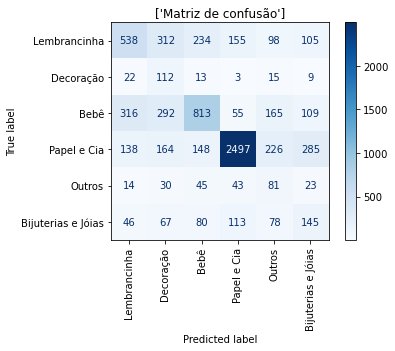

In [10]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names = ['Lembrancinha','Decoração','Bebê','Papel e Cia','Outros','Bijuterias e Jóias']
title = [("Matriz de confusão")]

disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues, xticks_rotation='vertical')
disp.ax_.set_title(title)

In [11]:
METRICS_PATH = ['A acuracia do modelo e:'+ str(accuracy)]
print(METRICS_PATH)

['A acuracia do modelo e:0.552']
